<a href="https://colab.research.google.com/github/KyoungmiKwon/trainingAtAiffel/blob/main/MiniQuest03_AARRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분석상황
문제 1 ~ 9 번: 여러분은 E-commere  플랫폼 기업에 입사했습니다.  
데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트에 참여하게 되었습니다.   
다음 문제들을 풀어보세요

AARRR을 포함한 **비즈니스 지표는 정답이 없으며 회사의 상황과 의사결정자의 판단에 따라 적절한 지표를 선택해주는 것이 중요**합니다.   
문제는 문제대로 푸시되, AARRR 지표에 더 좋은 옵션이 있으면 추가적으로 고민하고 기술하면서 분석역량을 키워보세요!

## 데이터설명

- 데이터 출처: https://archive.ics.uci.edu/dataset/502/online+retail+ii
- 컬럼 설명
    - `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    - `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
    - `Description`: Product (item) name. Nominal.
    - `Quantity`: The quantities of each product (item) per transaction. Numeric.
    - `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
    - `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
    - `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
    - `Country`: Country name. Nominal. The name of the country where a customer resides.

## 문제

In [ ]:
# import libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
from scipy.stats import *
from scipy import stats
from scipy.stats import uniform
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t

In [ ]:
# other settings
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus']=False # Unicode warning 제거 (폰트관련 경고 메세지)
# plt.rcParams['font.family'] = "NanumGothic" # 한글 폰트 설정

### **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [ ]:
from google.colab import files

uploaded = files.upload()

# 업로드된 파일 확인
for file_name in uploaded.keys():
    print(f'업로드된 파일: {file_name}')

Saving online_retail_II.xlsx to online_retail_II (1).xlsx
업로드된 파일: online_retail_II (1).xlsx


In [ ]:
# 데이터의 첫 5개 행을 출력, 데이터 형식 확인
df = pd.read_excel('/content/online_retail_II.xlsx', sheet_name = [0,1])
df = pd.concat(df.values())
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# 데이터프레임의 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#### 중복데이터 확인 및 제거

In [ ]:
df[df.duplicated()] # 중복 데이터 확인

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df[df.duplicated() & (df['Invoice'] == 489517)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
390,489517,84951A,S/4 PISTACHIO LOVEBIRD COASTERS,1,2009-12-01 11:34:00,2.55,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [ ]:
df[(df['Invoice'] == 489517) & (df['StockCode'] == 21912)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [ ]:
df_1 = df.drop_duplicates()
df_1.duplicated().sum() # 중복 제거 후 확인

np.int64(0)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.9+ MB


#### 결측데이터 확인

In [ ]:
df_1.isna().sum()

,0
Invoice,0
StockCode,0
Description,4275
Quantity,0
InvoiceDate,0
Price,0
Customer ID,235151
Country,0


In [ ]:
df_1[df_1['Description'].isna()] # Description stockcode에 따른 정보이므로 관련 결측치는 나중에 채우던가 컬럼 자제를 지우던가 할 예정

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df_1[df_1['Customer ID'].isna()] # CustomerID가 없다면 지워야 함(RRR 단계 분석 불가)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [ ]:
# Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터를 정렬
df_2['Customer ID'] = df_2['Customer ID'].astype(int)
df_2 = df_2.sort_values(by = 'InvoiceDate')
df_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [ ]:
# InvoiceDate 컬럼 날짜 형식으로 변환
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'])
df_1['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 1033036 entries, 0 to 541909
Series name: InvoiceDate
Non-Null Count    Dtype         
--------------    -----         
1033036 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.8 MB


In [ ]:
# Customer ID에 결측치가 있는 행 제거
df_2 = df_1.dropna(subset=['Customer ID'])
df_2.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [ ]:
# 금액을 나타내는 새로운 컬럼 Total 을 생성 (Quantity와 Price를 곱한 값)
df_2['Total'] = df_2['Quantity'] * df_2['Price']
df_2.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [ ]:
c_df = df_2.groupby('Country')['Customer ID'].nunique()
c_df = c_df.reset_index()
c_df.columns = ['Country', 'CustomerIDCount']
c_df = c_df.sort_values(by = 'CustomerIDCount', ascending = False)
c_df.head()

,Country,CustomerIDCount
38,United Kingdom,5410
14,Germany,107
13,France,95
32,Spain,41
3,Belgium,29


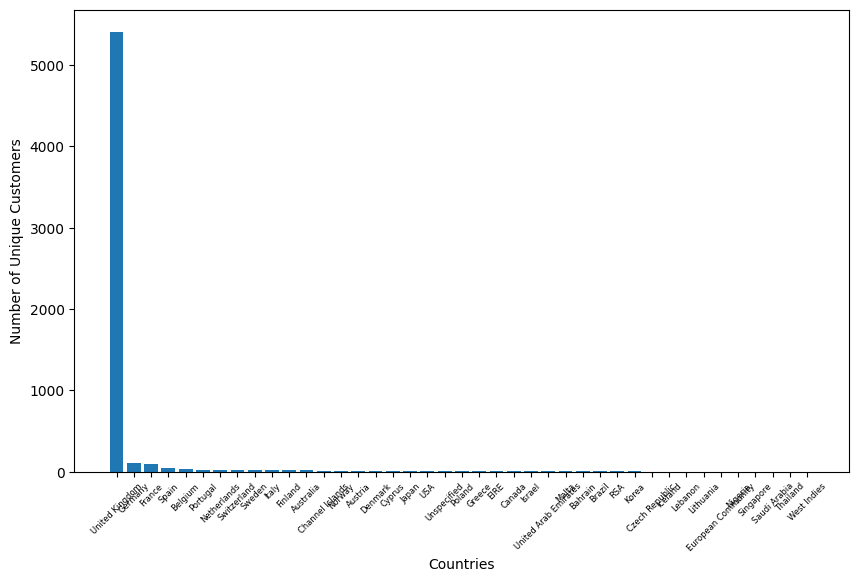

In [ ]:
plt.rcdefaults()
plt.figure(figsize = (10, 6))
plt.bar(data = c_df, x = 'Country', height = 'CustomerIDCount')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation = 45, fontsize = 6 )
plt.show()

### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [ ]:
# 신규 고객 분석을 위해 고객의 첫 구매 시점을 기준으로 월별 신규 유입 고객 수를 계산
f_date = df_2.groupby('Customer ID')['InvoiceDate'].min()
f_date = f_date.reset_index()
f_date.columns = ['Customer ID', 'FirstPurchaseDate']
f_date.head()
f_date.info()
f_date['FirstPurchaseDate'] = f_date['FirstPurchaseDate'].dt.strftime('%Y-%m')
f_date.head()
f_date.groupby('FirstPurchaseDate')['Customer ID'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        5942 non-null   float64       
 1   FirstPurchaseDate  5942 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.0 KB


,Customer ID
FirstPurchaseDate,
2009-12,1045
2010-01,394
2010-02,363
2010-03,436
2010-04,291
2010-05,254
2010-06,269
2010-07,183
2010-08,158


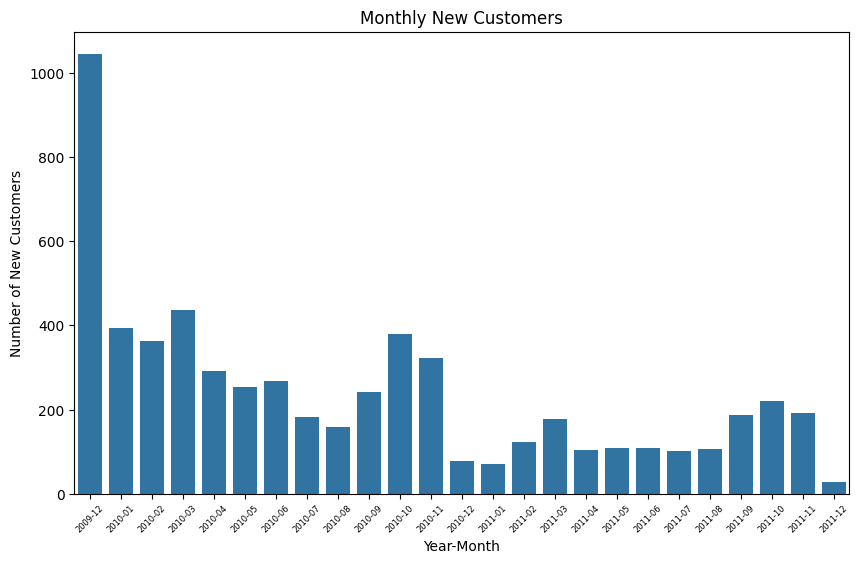

In [ ]:
# 각 고객의 첫 구매 날짜를 추출하고, 월별 신규 고객 수를 시각화하세요.
f_date_1 = f_date.groupby('FirstPurchaseDate')['Customer ID'].count()
f_date_1 = f_date_1.reset_index()
f_date_1.columns = ['FirstPurchaseDate', 'NewCustomers']
f_date_1.head()

plt.figure(figsize = (10, 6))
sns.barplot(data = f_date_1, x = 'FirstPurchaseDate', y = 'NewCustomers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation = 45, fontsize = 6 )
plt.title('Monthly New Customers')
plt.show()

In [ ]:
f_date = df_2.groupby('Customer ID')['InvoiceDate'].min()
f_date = f_date.reset_index()
f_date.columns = ['Customer ID', 'FirstPurchaseDate']
f_date.head()
f_date.info()
df_3 = df_2.merge(f_date, on = 'Customer ID', how = 'left')
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        5942 non-null   float64       
 1   FirstPurchaseDate  5942 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.0 KB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstPurchaseDate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01 07:45:00


### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            797885 non-null  object        
 1   StockCode          797885 non-null  object        
 2   Description        797885 non-null  object        
 3   Quantity           797885 non-null  int64         
 4   InvoiceDate        797885 non-null  datetime64[ns]
 5   Price              797885 non-null  float64       
 6   Customer ID        797885 non-null  float64       
 7   Country            797885 non-null  object        
 8   Total              797885 non-null  float64       
 9   FirstPurchaseDate  797885 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 60.9+ MB


In [ ]:
df_3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstPurchaseDate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01 07:45:00


In [ ]:
# 모든 고객 중 (첫 구매 이후) 총 구매 금액이 특정 기준 금액 (£50) 이상인 고객을 활성화된 고객으로 정의
tt_customer = df_3['Customer ID'].nunique() # 총 고객수
act_customer = len(df_3[df_3['InvoiceDate'] > df_3['FirstPurchaseDate']].groupby('Customer ID')['Total'].sum()) # 활성화 된 고객 수
tt_customer,act_customer

(5942, 4482)

In [ ]:
# Test 1
active_df = df_3[df_3['InvoiceDate'] > df_3['FirstPurchaseDate']]
# a
active_df['Customer ID'].nunique()
active_df.groupby('Customer ID')['Total'].sum()

,Total
Customer ID,
12346.0,-96.74
12347.0,4310.00
12348.0,1797.24
12349.0,4428.69
12352.0,1745.46
...,...
18282.0,76.39
18283.0,2568.00
18284.0,-25.00


In [ ]:
# Test 2
b = df_3.groupby('Customer ID')['Total'].sum()
b = b.reset_index()
b.columns = ['Customer ID', 'Total']
b.head()
b[b['Total'] >= 50]

,Customer ID,Total
1,12347.0,4921.53
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40
5,12351.0,300.93
...,...,...
5937,18283.0,2664.90
5938,18284.0,436.68
5939,18285.0,427.00
5940,18286.0,1188.43


In [ ]:
# 활성화율 도출
print(f'전체 고객 수: {tt_customer}\n활성화된 고객 수: {act_customer}')
print(f'활성화율: {(act_customer / tt_customer) * 100 :.2f } %')

전체 고객 수: 5942
활성화된 고객 수: 4482


ValueError: Invalid format specifier '.2f ' for object of type 'float'

### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [ ]:
df_4 = df_3.copy()
df_4['InvYQ'] = df_4['InvoiceDate'].dt.to_period('Q')
df_4['Cohort'] = df_4['FirstPurchaseDate'].dt.to_period('Q')
df_4.head()

In [ ]:
df_4.info()

In [ ]:
df_4['cohort_idx'] = df_4['InvYQ'] - df_4['Cohort']
df_4['cohort_idx'] = df_4['cohort_idx'].apply(attrgetter('n'))
df_4.head()

In [ ]:
cohort_df = df_4.groupby(['Cohort', 'cohort_idx'])['Customer ID'].nunique()
cohort_df = cohort_df.reset_index()
cohort_df.columns = ['Cohort', 'cohort_idx', 'MAU']
cohort_df

cohort_sizes = cohort_df[cohort_df['cohort_idx'] == 0][['Cohort', 'MAU']]
cohort_sizes.columns = ['Cohort', 'Cohort_size']
cohort_sizes

In [ ]:
cohort_df = cohort_df.merge(cohort_sizes, on = 'Cohort')
cohort_df.head()

In [ ]:
cohort_df['RetentionRate'] = cohort_df['MAU'] / cohort_df['Cohort_size'] * 100
cohort_df.head()
retention = cohort_df.pivot(index = 'Cohort', columns = 'cohort_idx', values = 'RetentionRate')
retention

In [ ]:
#히트맵 코드
plt.figure(figsize = (10, 6))

heatmap = sns.heatmap(
    data= retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100,           # Retention Rate의 범위 설정
    annot_kws={'size': 10}
)

plt.title('Cohort Analysis: Retention Rate')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()

### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

In [ ]:
df_4.head()

In [ ]:
cohort_quantity = df_4.groupby(['Cohort', 'cohort_idx'])['Quantity'].mean().round(2)
cohort_quantity = cohort_quantity.reset_index()
cohort_quantity.columns = ['Cohort', 'cohort_idx', 'AverageQuantity']
cohort_quantity
average_quantity = cohort_quantity.pivot(index = 'Cohort', columns = 'cohort_idx', values = 'AverageQuantity')
average_quantity

In [ ]:
#heatmap 코드

plt.figure(figsize = (10, 6))

heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)
plt.title('Cohort Analysis: Average Quantity')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()

### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [ ]:
df_5 = df_4.copy()
df_5['InvM'] = df_4['InvoiceDate'].dt.strftime('%Y-%m')
df_5.info()

In [ ]:
# 각 고객의 월별 구매금액 집계
monthly_r_perUser = df_5.groupby(['Customer ID', 'InvM'])['Total'].sum()
monthly_r_perUser = arpu.reset_index(drop = True)
monthly_r_perUser.columns = ['Customer ID', 'InvM', 'MonthlyRevenue']
monthly_r_perUser.head()

In [ ]:
# 월별 활성 사용자
monthly_a_users = df_5.groupby('InvM')['Customer ID'].nunique()
monthly_a_users = monthly_a_users.reset_index()
monthly_a_users.columns = ['InvM', 'ActiveUsers']
monthly_a_users.head()
# 월별 총 수익
monthly_revenue = df_5.groupby('InvM')['Total'].sum()
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue.columns = ['InvM', 'TotalRevenue']
monthly_revenue.head()

In [ ]:
# 월별 ARPU 계산
monthly_arpu = monthly_revenue.merge(monthly_a_users, on = 'InvM')
monthly_arpu['ARPU'] = monthly_arpu['TotalRevenue'] / monthly_arpu['ActiveUsers']
monthly_arpu.head()

In [ ]:
arpu = monthly_arpu[['InvM','ARPU']]

In [ ]:
arpu.info()

In [ ]:
arpu.head()

In [ ]:
#시각화코드
plt.figure(figsize=(12, 6))
plt.plot(arpu['InvM'], arpu['ARPU'], marker='o', color = 'skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation = 45)
plt.grid(axis = 'y')

plt.xlim('2010-01','2011-12')
plt.show()

### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [ ]:
df_6 = df_5.copy()
# 고객 별 구매금액
a = df_6.groupby('Customer ID')['Total'].sum()
a = a.reset_index()
a.columns = ['Customer ID', 'TotalRevenue']
a.head()

# 고객 별 구매 빈도
b = df_6.groupby('Customer ID')['Invoice'].count()
b = b.reset_index()
b.columns = ['Customer ID', 'Frequency']
b.head()

# 고객유지기간(nvoce Date의 최대 최소를 빼준 뒤 1을 더해주기)
c = df_6.groupby('Customer ID')['InvoiceDate'].max() - df_6.groupby('Customer ID')['InvoiceDate'].min() + pd.Timedelta(days = 1)
c = c.reset_index()
c.columns = ['Customer ID', 'CustomerLifespan(days)']

In [ ]:
clv_df = pd.merge(a, b, on = 'Customer ID')
clv_df = pd.merge(clv_df, c, on = 'Customer ID')
clv_df['CustomerLifespan(days)'] = clv_df['CustomerLifespan(days)'].dt.days
clv_df.head()

In [ ]:
clv_df['avg_revenue'] = clv_df['TotalRevenue'] / clv_df['Frequency']
clv_df['CLV'] = clv_df['avg_revenue'] * clv_df['Frequency'] * clv_df['CustomerLifespan(days)']
clv_df.sort_values(by = 'CLV', ascending = False).head()

In [ ]:
clv_df[clv_df['Customer ID'] == 17399]

In [ ]:
n_order = ['Customer ID', 'CLV', 'TotalRevenue', 'Frequency', 'CustomerLifespan(days)']
clv_df = clv_df[n_order].sort_values(by = 'CLV', ascending = False)
clv_df.head()

### 문제10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다.  
고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [ ]:
a = uniform.rvs(loc = 5, scale = 10, size = 100)

mean_waiting_time = np.mean(a)
std_waiting_time = np.std(a)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

### 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다.    
10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [ ]:
a = bernoulli.rvs(p = 0.3, size = 10)

outcomes = a
success_count = np.sum(a)

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

### 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다.   
각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고,    
전체 학생의 평균 점수를 계산하세요.

In [ ]:
a = binom.rvs(5, 0.7, size = 20)

scores = a
average_score = np.mean(a)
print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.   
1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요.       
무게 분포의 히스토그램을 그리세요.

In [ ]:
_avg = 50
_std = 5

a = norm.rvs(loc = _avg, scale = _std, size = 1000)

within_range = norm.cdf(55, loc = _avg, scale = _std) - norm.cdf(45, loc = _avg, scale = _std)
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

In [ ]:
a

In [ ]:
# 히스토그램 그리기

plt.figure(figsize=(12, 6))
plt.hist(a, bins = 30, alpha = 0.7, density = True)

# 정규분포곡선 추가
x = np.linspace(min(a),max(a),300)
p = norm.pdf(x, loc = _avg, scale = _std)
plt.plot(x, p, 'r', linewidth = 2)

plt.show()

## 회고

Keep : skeptical thinking, 언제나 주워진 과제의 요구사항들을 스스로 탐색하고 생각하였다.
Try : GPT 좀 덜 사용하기
Problem : 집중 할 때, 다른 사람이야기가 안들린다.